# Acquisition, Compréhension et Préparation des Données: BO1

# Import Libraries
**Let's import all necessary libraries for the analysis and along with it let's bring down our dataset**

In [761]:
!pip uninstall -y pyarrow
!pip install --no-cache-dir pyarrow

Found existing installation: pyarrow 19.0.1
Uninstalling pyarrow-19.0.1:
  Successfully uninstalled pyarrow-19.0.1
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.3 MB 262.6 kB/s eta 0:01:37
   ---------------------------------------- 0.1/25.3 MB 409.6 kB/s eta 0:01:02
   ---------------------------------------- 0.1/25.3 MB 722.1 kB/s eta 0:00:35
   ---------------------------------------- 0.2/25.3 MB 1.0 MB/s eta 0:00:25
    --------------------------------------- 0.3/25.3 MB 1.2 MB/s eta 0:00:21
    --------------------------------------- 0.5/25.3 MB 1.4 MB/s eta 0:00:18
    --------------------------------------- 0.6/25.3 MB 1.5 MB/s eta 0:00:17
   - -------------------------------------- 0.7/25.3 MB 1.6 MB/s eta 0:00:16
   - -------------------------------------- 0.8/25.3 MB 1.7 MB/s eta 0:00:15
   - -------------------------------------- 0.

In [755]:
!pip install datasets

   ---------------------------------------- 0.0/485.4 kB ? eta -:--:--
   ------ --------------------------------- 81.9/485.4 kB 1.5 MB/s eta 0:00:01
   ------------- -------------------------- 163.8/485.4 kB 1.6 MB/s eta 0:00:01
   --------------------- ------------------ 266.2/485.4 kB 1.8 MB/s eta 0:00:01
   ------------------------------ --------- 368.6/485.4 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  481.3/485.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 485.4/485.4 kB 1.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/146.7 kB ? eta -:--:--
   ------------------------- -------------- 92.2/146.7 kB 2.6 MB/s eta 0:00:01
   ------------------------- -------------- 92.2/146.7 kB 2.6 MB/s eta 0:00:01
   ------------------------- -------------- 92.2/146.7 kB 2.6 MB/s eta 0:00:01
   ----------------------------- -------- 112.6/146.7 kB 652.2 kB/s eta 0:00:01
   ----------------------------- -------- 112.6/146.7 kB 652.2

  You can safely remove it manually.


In [686]:
# Importation des bibliothèques
import json
import pandas as pd
from tqdm import tqdm  # Pour afficher une barre de progression
import matplotlib.pyplot as plt  # Pour la visualisation des données
import seaborn as sns  # Pour des graphiques plus attrayants
from wordcloud import WordCloud  # Pour créer des nuages de mots
from collections import Counter  # Pour compter les mots les plus fréquents
from nltk.corpus import stopwords  # Pour supprimer les stopwords
from nltk.stem import WordNetLemmatizer  # Pour la lemmatisation
import nltk
#NLTK libraries
from nltk.stem import WordNetLemmatizer
import nltk
import re
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Téléchargement des ressources NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Chargement des données JSON

In [688]:
# Chemin du fichier JSON
file_path = 'All_Beauty_5.json'

# Chargement des données JSON
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in tqdm(f, desc="Chargement des données"):
        data.append(json.loads(line))

Chargement des données: 5269it [00:00, 43906.02it/s]


In [689]:
# Affichage du nombre total de commentaires
print(f"Nombre total de commentaires : {len(data)}")

Nombre total de commentaires : 5269


In [690]:
# Affichage du premier commentaire pour comprendre la structure
print(json.dumps(data[0], indent=4))

{
    "overall": 5.0,
    "verified": true,
    "reviewTime": "09 1, 2016",
    "reviewerID": "A3CIUOJXQ5VDQ2",
    "asin": "B0000530HU",
    "style": {
        "Size:": " 7.0 oz",
        "Flavor:": " Classic Ice Blue"
    },
    "reviewerName": "Shelly F",
    "reviewText": "As advertised. Reasonably priced",
    "summary": "Five Stars",
    "unixReviewTime": 1472688000
}


In [691]:
# Liste des clés disponibles dans les données
print("\nClés disponibles :", data[0].keys())


Clés disponibles : dict_keys(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime'])


**Conversion en DataFrame**

In [693]:
# Conversion en DataFrame
df = pd.DataFrame(data)

In [694]:

# Affichage des premières lignes du DataFrame
print("\nPremières lignes du DataFrame :")
df.head()


Premières lignes du DataFrame :


,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,As advertised. Reasonably priced,Five Stars,1472688000,NaN,NaN
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,Like the oder and the feel when I put it on my...,Good for the face,1384387200,NaN,NaN
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,I bought this to smell nice after I shave. Wh...,Smells awful,1376784000,NaN,NaN
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,HEY!! I am an Aqua Velva Man and absolutely lo...,Truth is There IS Nothing Like an AQUA VELVA MAN.,1304380800,25,NaN
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,If you ever want to feel pampered by a shampoo...,Bvlgari Shampoo,1304640000,3,NaN


In [695]:
## print shape of dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(df.shape))
print (df.info())

The shape of the  data is (row, column):(5269, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         5269 non-null   float64
 1   verified        5269 non-null   bool   
 2   reviewTime      5269 non-null   object 
 3   reviewerID      5269 non-null   object 
 4   asin            5269 non-null   object 
 5   style           4624 non-null   object 
 6   reviewerName    5269 non-null   object 
 7   reviewText      5264 non-null   object 
 8   summary         5264 non-null   object 
 9   unixReviewTime  5269 non-null   int64  
 10  vote            552 non-null    object 
 11  image           98 non-null     object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 458.1+ KB
None


## Dataset Details
- **overall**: Rating given by the customer.
- **verified**: Verified purchase (True/False).
- **reviewTime**: Date of the review.
- **reviewerID**: Unique ID of the user.
- **asin**: Unique ID of the product.
- **style**: Variant or style of the product.
- **reviewerName**: Name or pseudonym of the user.
- **reviewText**: Full text of the review.
- **summary**: Summary or title of the review.
- **unixReviewTime**: Date of the review (Unix timestamp).
- **vote**: Helpful votes for the review.
- **image**: URL(s) of the product image(s).


# I. Preprocessing and cleaning

**We got to do lot of preprocessing before sending the reviews to the model. Let's go step by step.**

## 1- Handling NaN values

**Let's check for null values**

In [699]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Valeurs manquantes par colonne :
overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
style              645
reviewerName         0
reviewText           5
summary              5
unixReviewTime       0
vote              4717
image             5171
dtype: int64


In [700]:
#Creating a copy
process_reviews=df.copy()

**reviewText et summary : Ces colonnes sont critiques pour l'analyse de texte. Supprimez les lignes où ces valeurs sont manquantes**

In [702]:
process_reviews['style'] = process_reviews['style'].fillna('Missing')

In [703]:
process_reviews = process_reviews.dropna(subset=['summary', 'reviewText'])

In [704]:
process_reviews = process_reviews.drop(columns=['vote', 'image'])

In [705]:
print(process_reviews.isnull().sum())

overall           0
verified          0
reviewTime        0
reviewerID        0
asin              0
style             0
reviewerName      0
reviewText        0
summary           0
unixReviewTime    0
dtype: int64


## 2-Nettoyage du Texte
Les colonnes reviewText et summary contiennent du texte brut. Voici comment les nettoyer :

**a-Let's begin our text processing by removing the punctuations**

In [708]:
#Creating a copy 
clean_reviews=process_reviews.copy()

In [709]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [710]:
process_reviews['reviewText']=process_reviews['reviewText'].apply(lambda x:review_cleaning(x))

In [711]:
process_reviews['summary']=process_reviews['summary'].apply(lambda x:review_cleaning(x))

**b-Review text-Stop words**

Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [713]:
stop_words = set(stopwords.words('english'))
process_reviews['reviewText'] = process_reviews['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
process_reviews['summary'] = process_reviews['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [714]:
process_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5.0,True,"09 1, 2016",A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,advertised reasonably priced,five stars,1472688000
1,5.0,True,"11 14, 2013",A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,like oder feel put face tried brands reviews p...,good face,1384387200
2,1.0,True,"08 18, 2013",A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,bought smell nice shave put smelled awful smel...,smells awful,1376784000
3,5.0,False,"05 3, 2011",A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,hey aqua velva man absolutely love stuff using...,truth nothing like aqua velva man,1304380800
4,5.0,True,"05 6, 2011",A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,ever want feel pampered shampoo one one smells...,bvlgari shampoo,1304640000


**c-Lemmatisation:**

Réduisez les mots à leur forme de base (par exemple, "running" → "run").

In [716]:
lemmatizer = WordNetLemmatizer()
process_reviews['reviewText'] = process_reviews['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
process_reviews['summary'] = process_reviews['summary'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

## 3. Conversion des Types de Données

Assurez-vous que les types de données sont corrects pour chaque colonne.

**reviewTime** : Convertissez cette colonne en type datetime.

In [719]:
process_reviews['reviewTime'] = pd.to_datetime(process_reviews['reviewTime'], format='%m %d, %Y')

**verified :** Convertissez cette colonne en type int (1 pour True, 0 pour False).

In [721]:
process_reviews['verified'] = process_reviews['verified'].astype(int)

In [722]:
process_reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime
0,5.0,1,2016-09-01,A3CIUOJXQ5VDQ2,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Shelly F,advertised reasonably priced,five star,1472688000
1,5.0,1,2013-11-14,A3H7T87S984REU,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",houserules18,like oder feel put face tried brand review peo...,good face,1384387200
2,1.0,1,2013-08-18,A3J034YH7UG4KT,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Adam,bought smell nice shave put smelled awful smel...,smell awful,1376784000
3,5.0,0,2011-05-03,A2UEO5XR3598GI,B0000530HU,"{'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...",Rich K,hey aqua velva man absolutely love stuff using...,truth nothing like aqua velva man,1304380800
4,5.0,1,2011-05-06,A3SFRT223XXWF7,B00006L9LC,{'Size:': ' 200ml/6.7oz'},C. C. Christian,ever want feel pampered shampoo one one smell ...,bvlgari shampoo,1304640000


## 4. Gestion des Colonnes Non Utiles

Certaines colonnes ne sont pas nécessaires pour l'analyse ou le fine-tuning des modèles. Vous pouvez les supprimer

In [724]:
process_reviews = process_reviews.drop(columns=['reviewerID', 'asin', 'reviewerName', 'unixReviewTime', 'style'])

## 5. Création de Colonnes Supplémentaires

Vous pouvez créer de nouvelles colonnes pour améliorer l'analyse.

**Longueur du texte** : Ajoutez une colonne pour la longueur des commentaires.

In [727]:
process_reviews['reviewText_length'] = process_reviews['reviewText'].apply(len)

**Sentiment** : Convertissez la colonne overall en sentiment (positif, négatif, neutre).

In [729]:
process_reviews['sentiment'] = process_reviews['overall'].apply(lambda x: 'positif' if x >= 4 else ('négatif' if x <= 2 else 'neutre'))

In [730]:
process_reviews.head()

,overall,verified,reviewTime,reviewText,summary,reviewText_length,sentiment
0,5.0,1,2016-09-01,advertised reasonably priced,five star,28,positif
1,5.0,1,2013-11-14,like oder feel put face tried brand review peo...,good face,101,positif
2,1.0,1,2013-08-18,bought smell nice shave put smelled awful smel...,smell awful,79,négatif
3,5.0,0,2011-05-03,hey aqua velva man absolutely love stuff using...,truth nothing like aqua velva man,826,positif
4,5.0,1,2011-05-06,ever want feel pampered shampoo one one smell ...,bvlgari shampoo,140,positif


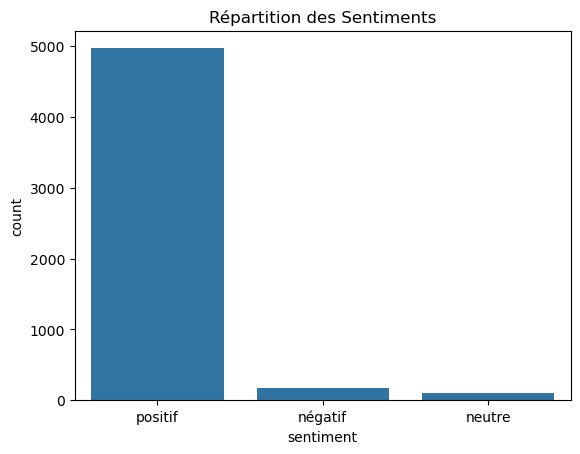

sentiment
positif    4971
négatif     179
neutre      109
Name: count, dtype: int64


In [731]:
# Affichage de la répartition des sentiments
sns.countplot(x='sentiment', data=process_reviews)
plt.title("Répartition des Sentiments")
plt.show()

# Affichage des comptes
print(process_reviews['sentiment'].value_counts())

In [732]:
from sklearn.utils import resample

# Séparation des classes
df_positif = process_reviews[process_reviews['sentiment'] == 'positif']
df_negatif = process_reviews[process_reviews['sentiment'] == 'négatif']
df_neutre = process_reviews[process_reviews['sentiment'] == 'neutre']

# Sur-échantillonnage des classes minoritaires
df_negatif_oversampled = resample(df_negatif, replace=True, n_samples=len(df_positif), random_state=42)
df_neutre_oversampled = resample(df_neutre, replace=True, n_samples=len(df_positif), random_state=42)

# Combinaison des données rééquilibrées
process_reviews_balanced = pd.concat([df_positif, df_negatif_oversampled, df_neutre_oversampled])

# Vérification de la répartition
print(process_reviews_balanced['sentiment'].value_counts())

sentiment
positif    4971
négatif    4971
neutre     4971
Name: count, dtype: int64


In [733]:
process_reviews_balanced.head()

,overall,verified,reviewTime,reviewText,summary,reviewText_length,sentiment
0,5.0,1,2016-09-01,advertised reasonably priced,five star,28,positif
1,5.0,1,2013-11-14,like oder feel put face tried brand review peo...,good face,101,positif
3,5.0,0,2011-05-03,hey aqua velva man absolutely love stuff using...,truth nothing like aqua velva man,826,positif
4,5.0,1,2011-05-06,ever want feel pampered shampoo one one smell ...,bvlgari shampoo,140,positif
5,5.0,0,2010-05-16,know scent diva youll love body creameveryone ...,diva heavenly,60,positif


**Conversion des Sentiments en Labels Numériques**

In [735]:
# Conversion des sentiments en labels numériques
process_reviews_balanced['label'] = process_reviews_balanced['sentiment'].map({'positif': 0, 'négatif': 1, 'neutre': 2})

# Affichage des premières lignes pour vérifier
print(process_reviews_balanced[['sentiment', 'label']].head())

  sentiment  label
0   positif      0
1   positif      0
3   positif      0
4   positif      0
5   positif      0


In [736]:
Data_BO1 = process_reviews_balanced.copy()

In [737]:
Data_BO1.head()

,overall,verified,reviewTime,reviewText,summary,reviewText_length,sentiment,label
0,5.0,1,2016-09-01,advertised reasonably priced,five star,28,positif,0
1,5.0,1,2013-11-14,like oder feel put face tried brand review peo...,good face,101,positif,0
3,5.0,0,2011-05-03,hey aqua velva man absolutely love stuff using...,truth nothing like aqua velva man,826,positif,0
4,5.0,1,2011-05-06,ever want feel pampered shampoo one one smell ...,bvlgari shampoo,140,positif,0
5,5.0,0,2010-05-16,know scent diva youll love body creameveryone ...,diva heavenly,60,positif,0


## 6. Analyse Exploratoire des Données (EDA)

**Répartition des sentiments :** Visualisez la distribution des sentiments (positif, négatif, neutre).

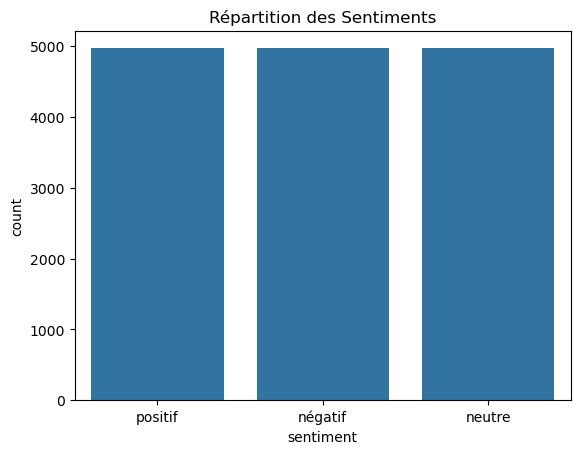

In [740]:
sns.countplot(x='sentiment', data=Data_BO1)
plt.title("Répartition des Sentiments")
plt.show()

**Mots les plus fréquents :** Identifiez les mots les plus fréquents dans les commentaires positifs et négatifs.

In [742]:
from collections import Counter
positive_words = Counter(" ".join(Data_BO1[Data_BO1['sentiment'] == 'positif']['reviewText']).split()).most_common(10)
negative_words = Counter(" ".join(Data_BO1[Data_BO1['sentiment'] == 'négatif']['reviewText']).split()).most_common(10)
print("Mots les plus fréquents dans les commentaires positifs :", positive_words)
print("Mots les plus fréquents dans les commentaires négatifs :", negative_words)

Mots les plus fréquents dans les commentaires positifs : [('product', 1829), ('love', 1701), ('hair', 1426), ('great', 1319), ('smell', 1051), ('like', 955), ('use', 845), ('skin', 827), ('good', 787), ('scent', 772)]
Mots les plus fréquents dans les commentaires négatifs : [('like', 2250), ('smell', 1915), ('hair', 1888), ('shampoo', 1832), ('product', 1514), ('water', 1419), ('really', 1353), ('bottle', 1257), ('review', 1211), ('get', 1185)]


**Longueur des commentaires :** Analysez la longueur des commentaires en fonction du sentiment.

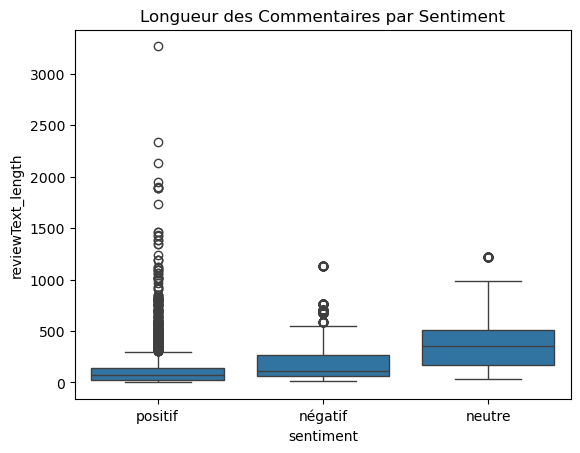

In [744]:
sns.boxplot(x='sentiment', y='reviewText_length', data=Data_BO1)
plt.title("Longueur des Commentaires par Sentiment")
plt.show()

## 7. Visualisation Interactive
Créez des visualisations interactives pour explorer les données .

**Nuage de Mots :** Visualisez les mots-clés les plus fréquents.

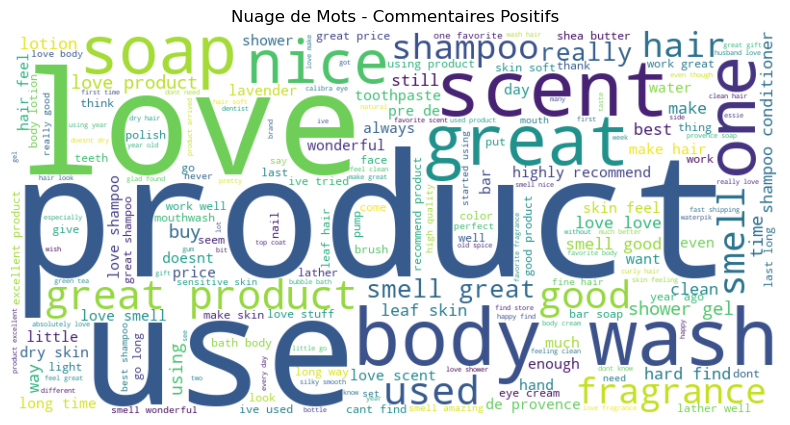

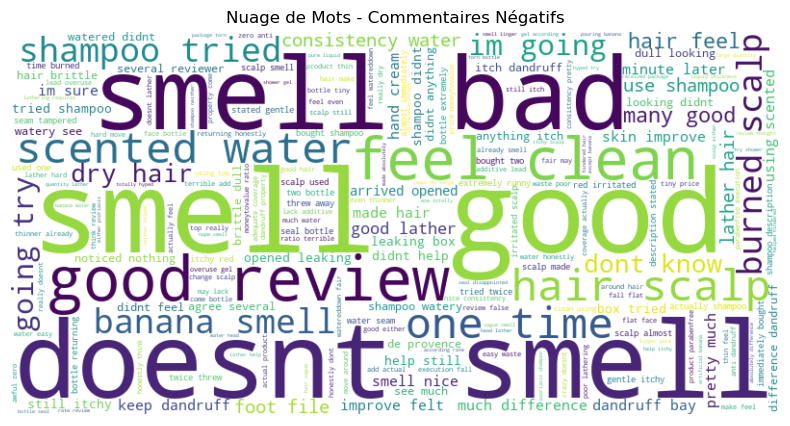

In [747]:
from wordcloud import WordCloud
positive_text = " ".join(Data_BO1[Data_BO1['sentiment'] == 'positif']['reviewText'])
negative_text = " ".join(Data_BO1[Data_BO1['sentiment'] == 'négatif']['reviewText'])

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de Mots - Commentaires Positifs")
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de Mots - Commentaires Négatifs")
plt.show()

## 8. Division des Données
Divisez vos données en ensembles d'entraînement, de validation et de test.

In [749]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(Data_BO1, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Affichage des tailles des ensembles
print(f"Taille de l'ensemble d'entraînement : {len(train_df)}")
print(f"Taille de l'ensemble de validation : {len(val_df)}")
print(f"Taille de l'ensemble de test : {len(test_df)}")

## 9. Sauvegarde des Données Nettoyées

Sauvegardez les données nettoyées pour les utiliser dans le fine-tuning des modèles.

In [752]:
train_df.to_csv('train_data_BO1.csv', index=False)
val_df.to_csv('val_data_BO1.csv', index=False)
test_df.to_csv('test_data_BO1.csv', index=False)

## 10. Conversion en Format Compatible avec Hugging Face
Le modèle Hugging Face nécessite un format spécifique pour les données. Nous allons convertir les DataFrame en objets Dataset.

In [ ]:
from datasets import Dataset

# Conversion en format Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# Affichage des informations sur les datasets
print(train_dataset)
print(val_dataset)
print(test_dataset)

# Modeling 

# Fine-Tuning des Modèles NLP avec Hugging Face

## Introduction
Ce notebook détaille les modèles de traitement du langage naturel (NLP) sélectionnés pour le fine-tuning des données préparées. Chaque modèle est utilisé pour une tâche spécifique afin d'extraire des insights à partir des avis clients.

## 1. Analyse de Sentiment
- **Modèle** : `distilbert-base-uncased-finetuned-sst-2-english`
- **Données** : `reviewText`, `sentiment`
- **Pourquoi ce choix ?** DistilBERT est une version allégée de BERT, optimisée pour la classification de texte. Ce modèle est déjà fine-tuné sur un jeu de données d'analyse de sentiment (SST-2) et permet de classer efficacement les avis comme positifs ou négatifs.
- **Objectif** : Prédire le sentiment des avis (positif/négatif)

## 2. Détection de Thèmes
- **Modèle** : `all-MiniLM-L6-v2`
- **Données** : `reviewText`
- **Pourquoi ce choix ?** Ce modèle produit des embeddings compacts et efficaces, adaptés pour des tâches de clustering comme BERTopic. Il est rapide et performant sur l'extraction de similarités textuelles.
- **Objectif** : Générer des embeddings et appliquer un clustering (ex: BERTopic) pour identifier les thèmes principaux

## 3. Génération de Résumés
- **Modèle** : `facebook/bart-large-cnn`
- **Données** : `reviewText`, `summary`
- **Pourquoi ce choix ?** BART est un modèle seq2seq pré-entraîné capable de générer des résumés précis et informatifs à partir de textes longs. Il est couramment utilisé pour la tâche de summarization.
- **Objectif** : Générer un résumé automatique des avis

## 4. Analyse des Tendances Temporelles
- **Modèle** : `t5-small`
- **Données** : `reviewText`, `reviewTime`
- **Pourquoi ce choix ?** T5 est un modèle transformer généraliste qui peut être utilisé pour reformuler du texte et extraire des informations contextuelles, y compris des tendances temporelles.
- **Objectif** : Extraire des informations temporelles à partir des avis

## 5. Recommandations Automatisées
- **Modèle** : `sentence-transformers/all-MiniLM-L6-v2`
- **Données** : `reviewText`
- **Pourquoi ce choix ?** Ce modèle génère des embeddings textuels qui permettent de mesurer la similarité entre différents avis, utile pour recommander du contenu similaire.
- **Objectif** : Générer des embeddings et identifier des similarités entre avis pour des recommandations

## 6. Classification de Texte
- **Modèle** : `distilbert-base-uncased`
- **Données** : `reviewText`
- **Pourquoi ce choix ?** DistilBERT est une alternative légère de BERT, bien adaptée aux tâches de classification multi-classes avec un bon compromis entre performance et rapidité.
- **Objectif** : Classer les avis en différentes catégories (plaintes, suggestions, éloges)

## 7. Extraction d'Informations
- **Modèle** : `dslim/bert-base-NER`
- **Données** : `reviewText`
- **Pourquoi ce choix ?** Ce modèle est spécifiquement entraîné pour la reconnaissance d'entités nommées (NER), permettant d'extraire des noms de produits, entreprises, dates, lieux, etc.
- **Objectif** : Extraire des entités nommées (noms  uide pour structurer le fine-tuning des modèles NLP._
